In [ ]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd 
import numpy as np
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [ ]:
oneyear = pd.read_csv('1Y .csv', index_col = 0)
twoyear = pd.read_csv('2Y.csv', index_col = 0)
threeyear = pd.read_csv('3Y.csv', index_col = 0) 
fouryear = pd.read_csv('4Y.csv', index_col = 0) 
fiveyear = pd.read_csv('5Y.csv', index_col = 0) 
sevenyear = pd.read_csv('7Y.csv', index_col = 0) 
tenyear = pd.read_csv('10Y.csv', index_col = 0) 
thirtyyear = pd.read_csv('30Y.csv', index_col = 0) 


df = pd.DataFrame({"OneYear": oneyear["Price"], "TwoYear": twoyear["Price"], "ThreeYear": threeyear["Price"] , 
                   "FourYear": fouryear["Price"] , "FiveYear": fiveyear["Price"] , "SevenYear": sevenyear["Price"] ,
                   "TenYear": tenyear["Price"] , "ThirtyYear": thirtyyear["Price"]})


df.corr(min_periods=3)

df.dropna(inplace= True)


In [ ]:
# Initialize to reduce the data up to the number of components that explains 99% of the variance.
model = PCA(n_components = 3)
# Fit transform
x_pca = model.fit_transform(df)
# Plot explained variance

x_pca = PCA(n_components = 3, svd_solver = 'full').fit(df)
print(x_pca.explained_variance_ratio_); print()
print("Reduced dimensions can explain{:.4f}".format(sum(x_pca.explained_variance_ratio_)),"% of the variance in the original data"); print()
print(x_pca.components_.shape[0])

[0.98005064 0.01662082 0.00274069]

Reduced dimensions can explain0.9994 % of the variance in the original data

3


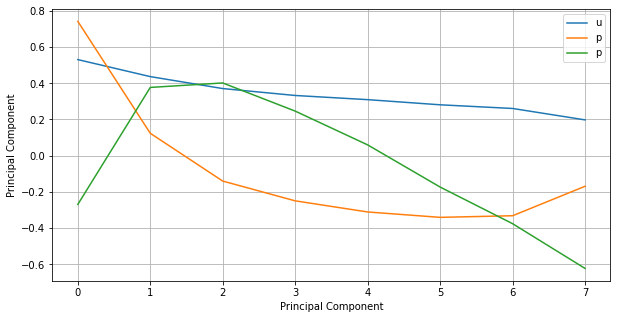

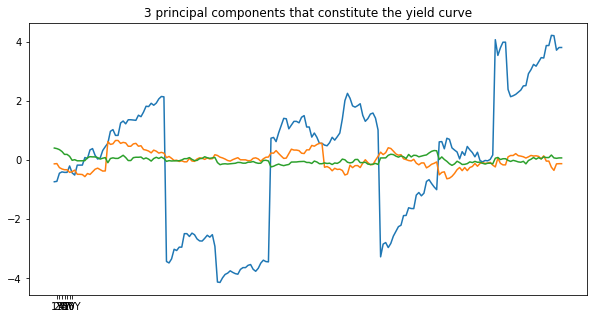

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.ylabel('Principal Component')
plt.plot(np.transpose(x_pca.components_))
plt.legend('upper right')
plt.xlabel('Principal Component')
plt.grid(True)
plt.show()
vals = x_pca.transform(df)
plt.figure(figsize=(10,5))
plt.title('3 principal components that constitute the yield curve')
plt.plot(vals)
x = [1, 2, 3, 4, 5, 6, 7]
labels = ['1Y', '2Y', '3Y', '4Y', '5Y', '7Y','10Y','30Y']
labels = []
plt.xticks(x, labels)
plt.show()

In [ ]:
pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np
import quandl as ql

In [ ]:
ql.ApiConfig.api_key = "qvsAiAW1stfswyd8KKsT"
swapNames = ['FRED/DSWP1', 'FRED/DSWP2', 'FRED/DSWP3', 'FRED/DSWP4', 'FRED/DSWP5','FRED/DSWP7', 'FRED/DSWP10']
df1 = ql.get(swapNames)
df1.dropna(inplace=True)
df1.columns = ["SWAP1", "SWAP2", "SWAP3", "SWAP4", "SWAP5", "SWAP7", "SWAP10"]
df1 



,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10
DATE,,,,,,,
2000-07-03,7.10,7.16,7.17,7.17,7.17,7.20,7.24
2000-07-05,7.03,7.06,7.07,7.07,7.08,7.11,7.14
2000-07-06,7.07,7.13,7.14,7.15,7.16,7.19,7.21
2000-07-07,7.01,7.04,7.06,7.06,7.07,7.10,7.14
2000-07-10,7.04,7.09,7.11,7.13,7.14,7.17,7.20
...,...,...,...,...,...,...,...
2016-10-24,0.99,1.08,1.15,1.22,1.30,1.43,1.61
2016-10-25,1.00,1.08,1.15,1.22,1.29,1.42,1.59
2016-10-26,1.01,1.10,1.18,1.25,1.33,1.47,1.64
